In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing advertising data set

adv = pd.read_csv('advertising.csv')

In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


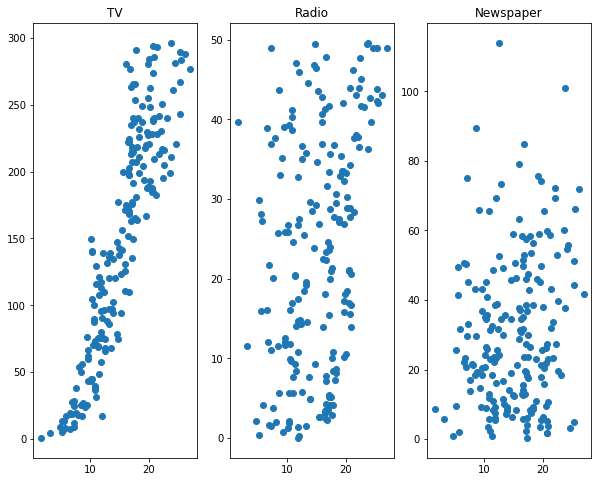

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.title('TV')
plt.scatter(adv['Sales'],adv['TV'])
plt.subplot(1,3,2)
plt.title('Radio')
plt.scatter(adv['Sales'],adv['Radio'])
plt.subplot(1,3,3)
plt.title('Newspaper')
plt.scatter(adv['Sales'],adv['Newspaper'])
plt.show()

In [8]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
#Lets built simple linear regression with TV and Sales

X = adv['TV']
y = adv['Sales']

In [10]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [11]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [12]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [13]:
#Performing the linear regression using statsmodel
import statsmodels.api as sm

In [14]:
#Statsmodel fits the line passing through the origin hence we add constant for the intercept

X_train_sm = sm.add_constant(X_train)

In [15]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [16]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
Sales = 0.05*TV + 6.95 #y = 0.05*x1 + 6.95

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        11:33:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

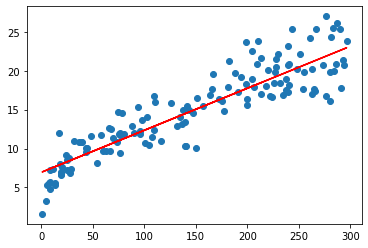

In [18]:
#plotting the scatter graph
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [19]:
#calculating the residues
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

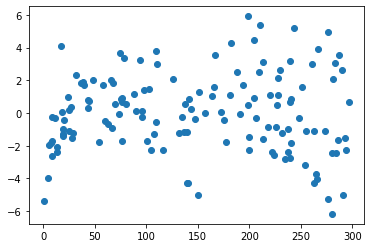

In [20]:
#scatter plot
plt.scatter(X_train,res)

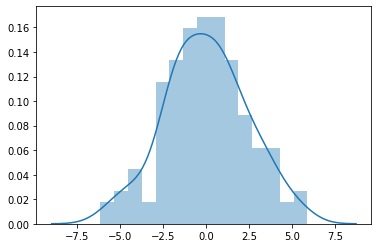

In [21]:
#error term distribution
sns.distplot(res,bins=15)
plt.show()

In [22]:
#Predicting it on the test data
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
#checking the accuracy
np.sqrt(mean_squared_error(y_test, y_pred)) #rmse root mean square error

2.019296008966233

In [25]:
r2_score(y_test,y_pred)

0.7921031601245658

#Is it better to scale the variables..
Yes, it would be better so that all variables will be in the same scale.

#There are two kinds of scaling
Standard scaling --> mean is 0 and std.dev is 1
min-max scaling  --> all the values will be b/w 0 and 1

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
X_train.head()
X_train.shape
type(X_train)

pandas.core.series.Series

In [30]:
X_train_scaled = np.array(X_train)

In [31]:
X_train_scaled1 = X_train_scaled.reshape(-1,1)

In [32]:
X_train_scaled2 = pd.DataFrame(X_train_scaled1)

In [33]:
y_train_scaled=np.array(y_train)
y_train_scaled1 = y_train_scaled.reshape(-1,1)
y_train_scaled2 = pd.DataFrame(y_train_scaled1)

In [34]:
X_train_scaled3 = scaler.fit_transform(X_train_scaled2)
y_train_scaled3 = scaler.fit_transform(y_train_scaled2)

In [35]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled4 = sm.add_constant(X_train_scaled3)

lr_scaled = sm.OLS(y_train_scaled3,X_train_scaled4).fit()

In [36]:
lr_scaled.params

array([0.21208131, 0.63500705])

In [37]:
lr_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        11:33:22   Log-Likelihood:                 131.74
No. Observations:                 140   AIC:                            -259.5
Df Residuals:                     138   BIC:                            -253.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.015     14.055      0.000       0.182       0.242
x1             0.6350      0.026     24.722      0.000       0.584       0.686
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""